# <center><font color='blue'>SENTIMENT ANALYSIS: COVID</center></font>


## Tabla de contenido
- [1 - Objetivos](#1)
- [2 - Librerías necesarias](#2)
- [3 - Carga y visualización de datos](#3)
- [4 - Pre-procesamiento de datos](#4)
    - [4.1. - Datos faltantes](#4.1)
    - [4.2. - Data Categóricos](#4.2)
    - [4.3. - Balanceo de clases](#4.3)
    - [4.4. - Pre-Procesamiento especial para NLP](#4.4)
- [5 - Modelos](#5)
    - [5.1. - Modelo 1](#5.1)
    - [5.2. - Modelo 2](#5.2)
    - [5.3. - Modelo 3](#5.3)
    - [5.4. - Modelo 4](#5.4)
    - [5.4. - Modelo 5](#5.5)
    - [5.4. - Modelo 6](#5.6)
    - [5.4. - Modelo 7](#5.7)
- [6 - Comparando los modelos y eligiendo el mejor](#6)
- [7 - Ajuste de hiperparámetros](#7)
- [8 - Predicciones con el modelo final](#8)
- [9 - Guardando el modelo](#9)
- [10 - Conclusiones](#10)

<a name="1"></a>
## 1. Objetivos

Practicar con un problema de procesamiento del lenguaje natural.
<br>
Aquí, dado un conjunto de tweets, analizar si el sentimiento es positivo, negativo o neutral.

<a name="2"></a>
## 2. Librerías necesarias

In [1]:
# que no se impriman info y warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras import layers,callbacks,models,Sequential,losses
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from keras import backend as K
import os,random
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers.experimental import preprocessing
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import csv
from datetime import datetime
from sklearn.model_selection import train_test_split 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import tensorflow_hub as hub
import keras_tuner

<a name="3"></a>
## 3. Carga y visualización de datos

Tenemos 2 datasets, uno para entrenamiento y otro para test:

In [11]:
train_data_pandas = pd.read_csv('data/Corona_NLP_train.csv',encoding='latin-1')
test_data_pandas = pd.read_csv('data/Corona_NLP_test.csv',encoding='latin-1')

In [12]:

pd.set_option('display.max_colwidth', None) # que No recorte el texto

train_data_pandas.head(15)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,"As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU",Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,"Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented ""I'm in Civics class so I know what I'm talking about"". https://t.co/ieFDNeHgDO",Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,"Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16. We will continue to process online and phone orders as normal! Thank you for your understanding! https://t.co/kw91zJ5O5i",Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona",Negative


<a name="4"></a>
## 4. Pre-procesamiento de datos

<a name="4.1."></a>
### 4.1. Datos faltantes

In [13]:
print(f'Datos faltantes train:\n {train_data_pandas.isnull().sum()} \n')
print(f'Datos faltantes test:\n {test_data_pandas.isnull().sum()}')

Datos faltantes train:
 UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64 

Datos faltantes test:
 UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64


Vemos que no hay datos faltantes en las columnas que nos interesan (OriginalTweet y Sentiment).

<a name="4.2"></a>
### 4.2. Datos categóricos 

Nos interesaremos en las columnas OriginalTweet y Sentiment; a su vez veremos las distintas opciones de esta última columna:

In [14]:
train_data_pandas['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

Convertiremos esta columna a valores numéricos; a su vez no nos interesa ser tan específicos respecto a si un sentimiento es postivo o extremadamente positivo, más bien distinguiremos entre positivo y negativo. Los neutrales los consideraremos positivos. 

In [15]:
label_map = {'Extremely Negative':0,'Negative':0,'Neutral':1,'Positive':1,'Extremely Positive':1}
train_data_pandas['Sentiment'] = train_data_pandas['Sentiment'].map(label_map)
test_data_pandas['Sentiment'] = test_data_pandas['Sentiment'].map(label_map)

Chequeamos

In [16]:
train_data_pandas['Sentiment'].unique()

array([1, 0])

<a name="4.3"></a>
### 4.3.  Balanceo de clases

Veamos si las clases están balanceadas.

In [18]:
[pos,neg] = train_data_pandas['Sentiment'].value_counts()

In [22]:
f"Los cocientes son {round(pos/(pos+neg),2)*100}% y {round(neg/(pos+neg),2)*100}%"

'Los cocientes son 63.0% y 37.0%'

Tenemos un desbalance moderado.

<a name="4.4"> </a>
### 4.4. Pre-procesamiento especial para NLP

Vamos a pe-procesar el texto de OriginalTweet, para ello:


- Quitaremos las stop-words
- Quitaremos algunos caracteres especiales, como "@"
- Aplicaremos Lemmatization


<b>Nota:</b> Habría que quitar también las puntuaciones, llevar todo a minúscula y tokenizar, pero eso lo haremos luego con TextVectorization.

Descargaremos e imprimiremos para ver las stop words:

In [23]:
nltk.download('stopwords')
# View stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /home/marcos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


También necesitaremos "punkt" y "wordnet":

In [24]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/marcos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/marcos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Quitamos las stop words y aplicaremos la lematización:

In [25]:
# Inicializar lematizador
lemmatizer = WordNetLemmatizer()

# stop words
stop_words = set(stopwords.words('english'))

# Función para quitar palabras de parada y lematizar un texto
def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Aplicar la función a la columna 'OriginalTweet' del dataset, tanto en train como test
train_data_pandas['OriginalTweet'] = train_data_pandas['OriginalTweet'].apply(preprocess_text)
test_data_pandas['OriginalTweet'] = test_data_pandas['OriginalTweet'].apply(preprocess_text)

Además vamos a eliminar caracteres especiales, como @ y # (nos quedaremos con otros, como "!", pues pueden ser importantes para el significado).

In [26]:
# Eliminar arrobas en direcciones de correo electrónico o menciones
def preprocess_text2(text):
    return re.sub(r'[@#]', '', text) #&

# lo aplicamos
train_data_pandas['OriginalTweet'] = train_data_pandas['OriginalTweet'].apply(preprocess_text2)
test_data_pandas['OriginalTweet'] = test_data_pandas['OriginalTweet'].apply(preprocess_text2)

Veamos cómo quedaron los datos:

In [27]:
train_data_pandas['OriginalTweet']

0                                                                                                                                              menyrbie  phil_gahan  chrisitv http : //t.co/ifz9fan2pa http : //t.co/xx6ghgfzcc http : //t.co/i2nlzdxno8
1                                                              advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order
2                                                                                                                      coronavirus australia : woolworth give elderly , disabled dedicated shopping hour amid covid-19 outbreak http : //t.co/binca9vp8p
3                       food stock one empty ... please , n't panic , enough food everyone take need . stay calm , stay safe .  covid19france  covid_19  covid19  coronavirus  confinement  confinementotal  confinementgeneral http : //t.co/zrlg0z520j
4   

#### Dividimos en train/val

In [28]:
# Dividir los datos en conjuntos de entrenamiento y validación
train_data, val_data = train_test_split(train_data_pandas, test_size=0.2, random_state=42)


#### Vamos ahora a crear los datasets para trabajar con tensorflow

In [29]:
# Cargar el DataFrame de pandas en un objeto tf.data.Dataset
# armo según lo que me interesa
train_dataset = tf.data.Dataset.from_tensor_slices((train_data['OriginalTweet'].values, 
                                              train_data['Sentiment'].values))



validation_dataset = tf.data.Dataset.from_tensor_slices((val_data['OriginalTweet'].values, 
                                              val_data['Sentiment'].values))



In [30]:
# veo un dato de train
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())
    

text:  b'unemployment claim made online virginia week : monday : 426 tuesday : 2,150 number going get bigger . http : //t.co/fueg2rl2dl'
label:  0


In [31]:
# Repetimos para test

# Cargar el DataFrame de pandas en un objeto tf.data.Dataset
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_pandas['OriginalTweet'].values, 
                                                   test_data_pandas['Sentiment'].values))

Definimos el tamaño del buffer y del lote:

In [32]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [33]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_dataset = validation_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

Veamos algunos ejemplos y sus etiquetas

In [34]:
for example, label in train_dataset.take(1):
  print(f'texts:  {example.numpy()[:3]}\n')
  print(f'labels: , {label.numpy()[:3]}')

texts:  [b'never realized much face itched grocery store  covid19pandemic .  coronaviruspandemic  covid_19  covid19'
 b' feedthenation 8,000 worker offered job bid keep supermarket shelf stocked . worker lost job result covid-19 offered new employment & amp ; training opportunity new initiative  stafflineuk  peopleplusuk http : //t.co/arg10eiqal'
 b'supermarket denmark us price trick stop sanitizer hoarding . bangladesh need step soon well . follow u ?  markedium  sanitizer  coronaviruspandemic  virus  coronachainscare  covid_19  coronavid19  coronacrisis  awareness  markedium http : //t.co/ewxjujz5mg']

labels: , [1 1 0]


Ahora crearemos y aplicaremos una capa llamada <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization" target='_blanck'>TextVectorization</a>, que quitará las puntuaciones, pasará todo a minúsculas y tokenizará:

In [35]:
VOCAB_SIZE = 10000
max_length = 45 # max length our sequences will be (e.g. how many words from a Tweet does a model see?)


encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE,
                                    output_mode="int")
                                    #output_sequence_length=max_length)

# Fit the text vectorizer instance to the training data using the adapt() method
encoder.adapt(train_dataset.map(lambda text, label: text))


A continuación se muestran los primeros 20 tokens:

In [36]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'http', 'coronavirus', 'covid19', 'price', 'store',
       'supermarket', 'food', 'grocery', 'people', 'amp', 'consumer',
       '19', 'covid', 'shopping', 's', 'online', 'need', 'time'],
      dtype='<U27')

Ahora que el vocabulario está configurado, la capa puede codificar el texto en índices. Los tensores de índices son rellenados con 0s para que tengan el tamaño de la secuencia más larga en el lote.

Veamos un ejemplo

In [37]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[ 223, 2923,  112,  123,    1,    9,    6, 1276,  264,    4,    4,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   1, 5905,   22, 1533,  130, 1978,   61,    7,   56,  465,   22,
         603,  130,  354,    4, 1533,   42, 1935,   11, 2549,  663,   42,
        1868,    1,    1,    2,    1,    0,    0,    0,    0,    0,    0,
           0],
       [   7, 2963,  361,    5, 2254,   75,   30,  205, 5118,   18,  445,
         387,  140,  452,   23,    1,   30,  264,   78,    1,    4, 2665,
         126, 1765,    1,    2,    1,    0,    0,    0,    0,    0,    0,
           0]])

Vemos que rellena con 0s hasta tener siempre un largo de 45.

Con esta configuración, el proceso no es completamente reversible (no hay un mapeo uno a uno)

In [38]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'never realized much face itched grocery store  covid19pandemic .  coronaviruspandemic  covid_19  covid19'
Round-trip:  never realized much face [UNK] grocery store covid19pandemic coronaviruspandemic covid19 covid19                       

Original:  b' feedthenation 8,000 worker offered job bid keep supermarket shelf stocked . worker lost job result covid-19 offered new employment & amp ; training opportunity new initiative  stafflineuk  peopleplusuk http : //t.co/arg10eiqal'
Round-trip:  [UNK] 8000 worker offered job bid keep supermarket shelf stocked worker lost job result covid19 offered new employment amp training opportunity new initiative [UNK] [UNK] http [UNK]       

Original:  b'supermarket denmark us price trick stop sanitizer hoarding . bangladesh need step soon well . follow u ?  markedium  sanitizer  coronaviruspandemic  virus  coronachainscare  covid_19  coronavid19  coronacrisis  awareness  markedium http : //t.co/ewxjujz5mg'
Round-trip:  supermarket denmar

Puede observarse que hay muchos tokens desconocidos ([UNK])

Finalmente, aplicaremos una capa de embedding.

In [39]:
embedding = tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, # set the input shape; size of our vocabulary
                                 output_dim=128, # set the size of the embedding vector
                                 embeddings_initializer="uniform", # default, initialize embedding vectors randomly
                                 input_length=max_length # how long is each input
                             )

embedding

<a name="5"> </a>
## Modelos

Probaremos distinos modelos.


In [40]:
tf.random.set_seed(42)

In [41]:
# para guardar los resultados y comparar después

results = []


In [42]:
INPUT_SHAPE=(1,)

<a name="5.1"> </a>
### Modelo 1

In [43]:
def build_model_1(input_shape,name):
    inputs = layers.Input(shape=input_shape, dtype=tf.string) # inputs are 1-dimensional strings
    x = encoder(inputs) # turn the input text into numbers 
    x = embedding(x)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.Model(inputs, outputs, name=name) # construct the model
    return model


model_1 = build_model_1(INPUT_SHAPE,'model_1')



In [44]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-tra

In [46]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy', 'Precision','Recall'])

# Fit the model
history_1 = model_1.fit(train_dataset,
                        epochs=5,
                        verbose=0,
                        validation_data=validation_dataset)


In [47]:
# evaluate
score1 = model_1.evaluate(test_dataset)

60/60 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8202 - precision: 0.8167 - recall: 0.8827


In [51]:
f"La exactitud fue {round(score1[1],2)*100}%, la precisión del {round(score1[2],2)*100}% y el recall de {round(score1[3],2)*100}%"

'La exactitud fue 82.0%, la precisión del 82.0% y el recall de 88.0%'

Guardamos los resultados para poder comparar después


In [52]:

model_1_results = {
    'name': 'Model 1',
    'accuracy':score1[1],
    'precision':score1[2],
    'recall':score1[3],
    'f1-score': (2*(score1[2]*score1[3]))/(score1[2]+score1[3])
}


results.append(model_1_results)


<a name="5.2"> </a>
### Modelo 2 : LSTM


Arquitectura típica de una RNN:



<img src="images/arq.png" width=80%>






In [53]:
def build_model_2(input_shape):
    inputs = layers.Input(shape=input_shape, dtype="string")
    x = encoder(inputs) # text vectorizer
    x = embedding(x)
    print(f"After embedding: {x.shape}")
    x = layers.LSTM(64, activation="tanh")(x)
    print(f"After LSTM cell: {x.shape}")
    x = layers.Dropout(0.5)(x) 
    x = layers.Dense(64, activation="relu")(x) # optional dense layer to have on top of LSTM layer
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.Model(inputs, outputs, name="model_2_LSTM")
    return model
    

model_2 = build_model_2(INPUT_SHAPE)
    


After embedding: (None, None, 128)
After LSTM cell: (None, 64)


In [54]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [55]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy', 'Precision','Recall'])

# Fit the model
history_2 = model_2.fit(train_dataset,
                        epochs=5,
                        verbose=0,
                        validation_data=validation_dataset)

In [56]:
# evaluate
score2 = model_2.evaluate(test_dataset)

60/60 [==============================] - 0s 8ms/step - loss: 0.6917 - accuracy: 0.8254 - precision: 0.8477 - recall: 0.8457


In [57]:
model_2_results = {
    'name': 'Model 2',
    'accuracy':score2[1],
    'precision':score2[2],
    'recall':score2[3],
    'f1-score': (2*(score2[2]*score2[3]))/(score2[2]+score2[3])
}


results.append(model_2_results)


<a name="5.3"> </a>
### Modelo 3 : GRU

In [58]:
def build_model_3(input_shape):
    inputs = layers.Input(shape=(1,), dtype="string")
    x = encoder(inputs)
    x = embedding(x)
    x = layers.GRU(64, activation="tanh")(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model= tf.keras.Model(inputs, outputs, name="model_3_GRU")
    return model


model_3 = build_model_3(INPUT_SHAPE)


In [59]:
# Compile model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy', 'Precision','Recall'])

# Fit the model
history_3 = model_3.fit(train_dataset,
                        epochs=5,
                        verbose=0,
                        validation_data=validation_dataset)

In [60]:
# evaluate
score3 = model_3.evaluate(test_dataset)



60/60 [==============================] - 0s 7ms/step - loss: 0.7857 - accuracy: 0.8167 - precision: 0.8151 - recall: 0.8776


In [61]:
model_3_results = {
    'name': 'Model 3',
    'accuracy':score3[1],
    'precision':score3[2],
    'recall':score3[3],
    'f1-score': (2*(score3[2]*score3[3]))/(score3[2]+score3[3])
}


results.append(model_3_results)

<a name="5.4"> </a>
### Modelo 4 : Bidirectional RNN model

<img src="images/model4.png">

In [62]:
def build_model_4(input_shape):
    inputs = layers.Input(shape=input_shape, dtype="string")
    x = encoder(inputs)
    x = embedding(x)
    x = layers.Bidirectional(layers.LSTM(64))(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")
    return model

model_4 = build_model_4(INPUT_SHAPE)
    
    

In [64]:
# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy', 'Precision','Recall'])

# Fit the model
history_4 = model_4.fit(train_dataset,
                        epochs=5,
                        verbose=0,
                        validation_data=validation_dataset)

In [65]:
# evaluate
score4 = model_4.evaluate(test_dataset)

60/60 [==============================] - 1s 11ms/step - loss: 1.0913 - accuracy: 0.8120 - precision: 0.8034 - recall: 0.8873


In [66]:
model_4_results = {
    'name': 'Model 4',
    'accuracy':score4[1],
    'precision':score4[2],
    'recall':score4[3],
    'f1-score': (2*(score3[2]*score3[3]))/(score3[2]+score3[3])
}


results.append(model_4_results)

<a name="5.5"> </a>
### Modelo 5 : Stacking layers

<img src='images/model5.png'>

In [67]:

# text vect. en la foto de arriba y la dense

def build_model_5(input_shape,name):
    inputs = layers.Input(shape=input_shape, dtype='string')
    x = encoder(inputs)
    x = embedding(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # return_sequences=True para apilar capas
    x = layers.Bidirectional(layers.LSTM(32))(x)
    x = layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs, outputs, name=name)
    return model
    

model_5 = build_model_5(INPUT_SHAPE, 'model_5')

model_5.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                           

In [68]:
# Compile model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy', 'Precision','Recall'])

# Fit the model
history_5 = model_5.fit(train_dataset,
                        epochs=5,
                        verbose=0,
                        validation_data=validation_dataset)

In [69]:
# evaluate
score5 = model_5.evaluate(test_dataset)

60/60 [==============================] - 1s 17ms/step - loss: 1.3003 - accuracy: 0.7859 - precision: 0.7649 - recall: 0.9016


In [70]:
model_5_results = {
    'name': 'Model 5',
    'accuracy':score5[1],
    'precision':score5[2],
    'recall':score5[3],
    'f1-score': (2*(score5[2]*score5[3]))/(score5[2]+score5[3])
}


results.append(model_5_results)

<a name="5.6"> </a>
### Modelo 6 : Conv1D

We've seen before how convolutional neural networks can be used for images but they can also be used for text.

Previously we've used the layer Conv2D (which is great for images with (height, width)).

But if we want to use convolutional layers for sequences (e.g. text) we need to use Conv1D: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

For more of a deep dive into what goes on behind the scenes in a CNN for text (or sequences) see the paper: https://arxiv.org/abs/1809.08037

In [72]:
def build_model_6(input_shape,name):
    inputs = layers.Input(shape=input_shape, dtype='string')
    x = encoder(inputs)
    x = embedding(x)
    x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
    x = layers.GlobalMaxPool1D()(x)
    outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs, name=name)
    return model
    
    
model_6 = build_model_6(INPUT_SHAPE, 'model_5')

In [73]:
model_6.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 output_layer (Dense)        (None, 1)                 33  

In [74]:
# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy', 'Precision','Recall'])

# Fit the model
history_6 = model_6.fit(train_dataset,
                        batch_size=BATCH_SIZE,
                        epochs=5,
                        verbose=0,
                        validation_data=validation_dataset)

In [75]:
# evaluate
score6 = model_6.evaluate(test_dataset)

60/60 [==============================] - 0s 3ms/step - loss: 0.7271 - accuracy: 0.8133 - precision: 0.8247 - recall: 0.8540


In [76]:
model_6_results = {
    'name': 'Model 6',
    'accuracy':score6[1],
    'precision':score6[2],
    'recall':score6[3],
    'f1-score': (2*(score6[2]*score6[3]))/(score6[2]+score6[3])
}


results.append(model_6_results)

<a name="5.7"> </a>
### Model 7: TensorFlow Hub Pretrained Sentence Encoder

Now we've built a few of our own models, let's try and use transfer learning for NLP, specifically using TensorFlow Hub's Universal Sentence Encoder: https://tfhub.dev/google/universal-sentence-encoder/4

See how the USE was created here: https://arxiv.org/abs/1803.11175

📖 **Resource:** TensorFlow Hub is a great resource for many pretrained models but HuggingFace is also another incredible resource for many pretrained NLP models (using HuggingFace model is beyond the scope of this course but it is definitely something you should be familiar with in the NLP space): https://huggingface.co/models

In [77]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
# se encarga de text vectorization y embedding

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")


In [79]:
def build_model_7(input_shape,name):
    # Entrada del modelo
    input_layer = layers.Input(shape=input_shape, dtype=tf.string, name="input_layer")
    squeezed_input = tf.squeeze(input_layer, axis=-1)
    # Capa de codificación de oraciones
    sentence_encoding = sentence_encoder_layer(squeezed_input)
    # Capa completamente conectada con activación ReLU
    dense_layer = layers.Dense(64, activation="relu")(sentence_encoding)
    # Capa de salida con activación sigmoide
    output_layer = layers.Dense(1, activation="sigmoid", name="output_layer")(dense_layer)
    # Crear el modelo funcional
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name=name)
    return model


model_7 = build_model_7(INPUT_SHAPE,'model_7')

model_7.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 tf.compat.v1.squeeze_1 (TFO  (None,)                  0         
 pLambda)                                                        
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
________________________________________

In [80]:
# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy', 'Precision','Recall'])


# Fit the model
history_7 = model_7.fit(train_dataset,
                        epochs=5,
                        verbose=0,
                        validation_data=validation_dataset)

In [81]:
# evaluate
score7 = model_7.evaluate(test_dataset)

60/60 [==============================] - 1s 9ms/step - loss: 0.5138 - accuracy: 0.7493 - precision: 0.7552 - recall: 0.8291


In [82]:
model_7_results = {
    'name': 'Model 7',
    'accuracy':score7[1],
    'precision':score7[2],
    'recall':score7[3],
    'f1-score': (2*(score7[2]*score7[3]))/(score7[2]+score7[3])
}


results.append(model_7_results)

<a name="6"> </a>
## Comparando los modelos y eligiendo el mejor

In [83]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame(results)
all_model_results

,name,accuracy,precision,recall,f1-score
0,Model 1,0.820168,0.816667,0.882679,0.848391
1,Model 2,0.825434,0.847685,0.845728,0.846705
2,Model 3,0.816746,0.815101,0.877598,0.845196
3,Model 4,0.812006,0.803430,0.887298,0.845196
4,Model 5,0.785940,0.764890,0.901617,0.827645
5,Model 6,0.813323,0.824710,0.854042,0.839120
6,Model 7,0.749342,0.755154,0.829099,0.790401


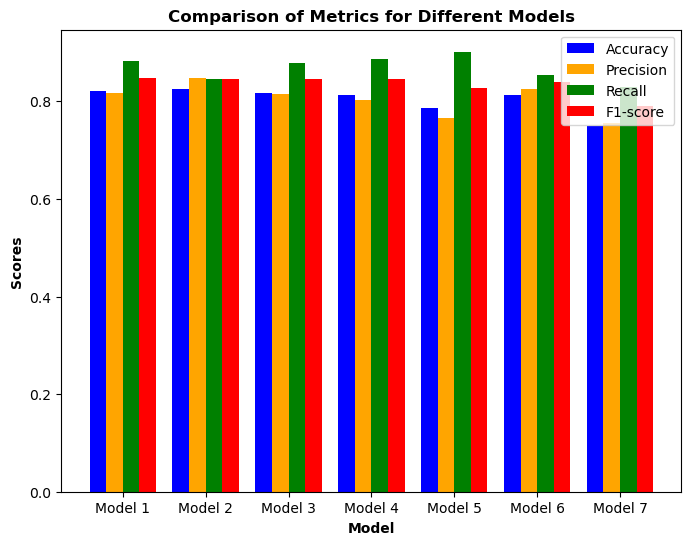

In [84]:
#all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

df = pd.DataFrame(results)



# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))


# Configurar el gráfico de barras
bar_width = 0.2
bar_positions = range(len(df['name']))
colors = ['blue', 'orange', 'green', 'red']

# Crear barras para cada métrica
plt.bar(bar_positions, df['accuracy'], width=bar_width, label='Accuracy', color=colors[0])
plt.bar([pos + bar_width for pos in bar_positions], df['precision'], width=bar_width, label='Precision', color=colors[1])
plt.bar([pos + 2*bar_width for pos in bar_positions], df['recall'], width=bar_width, label='Recall', color=colors[2])
plt.bar([pos + 3*bar_width for pos in bar_positions], df['f1-score'], width=bar_width, label='F1-score', color=colors[3])



# Añadir etiquetas y título
plt.xlabel('Model',fontweight='bold')
plt.ylabel('Scores',fontweight='bold')
plt.title('Comparison of Metrics for Different Models',fontweight='bold')
plt.xticks([pos + 1.5*bar_width for pos in bar_positions], df['name'])

# Añadir leyenda
plt.legend()

# Mostrar el gráfico de barras
plt.show()



Como tenemos cierto desbalance de clases (63/37) para elegir el mejor modelo consideraremos como métrica el F1-score.

Debe tenerse en cuenta, que esto es una simplificación, pues entrenamos solamente por 5 epochs y no estamos tomando en cuenta otros factores, como qué modelos son más propensos al overfitting, cuál tarda más al entrenarse y en la inferencia...


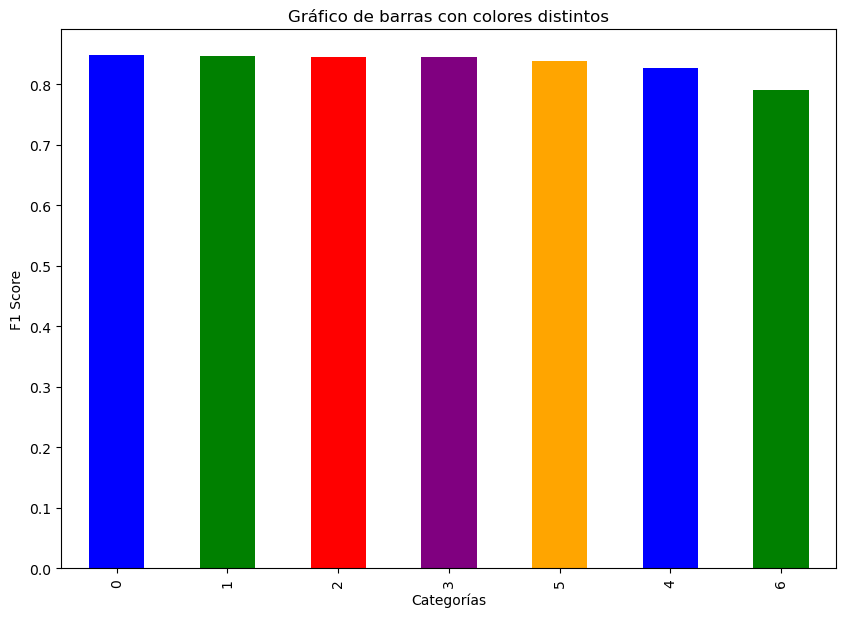

In [86]:
# Supongamos que df es tu DataFrame
df.sort_values("f1-score", ascending=False)["f1-score"].plot(kind="bar", figsize=(10, 7), color=['blue', 'green', 'red', 'purple', 'orange'])

plt.title('Gráfico de barras con colores distintos')
plt.xlabel('Categorías')
plt.ylabel('F1 Score')
plt.show()


In [87]:
indice_max = all_model_results['f1-score'].idxmax()

best_model = all_model_results['name'][0]

In [88]:
f"El mejor modelo siguiendo el criterio de mayor F1-score es {best_model}"

'El mejor modelo siguiendo el criterio de mayor F1-score es Model 1'

<a name="7"></a>
## 7. Ajuste de hiperparámetros

Probaremos con diferentes valores para la tasa de aprendizaje y por supuesto entrenaremos por más epochs.
También usaremos callbacks, como Early Stopping.

In [89]:
class MyHyperModel(keras_tuner.HyperModel) :
     def build(self, hp,input_shape=INPUT_SHAPE):
        inputs = layers.Input(shape=input_shape, dtype=tf.string)
        x = encoder(inputs)
        x = embedding(x)
        x = tf.keras.layers.GlobalAveragePooling1D()(x)
        outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
        model = tf.keras.Model(inputs, outputs, name="model_1_dense")
        # compile
        model.compile(optimizer=hp.Choice('optim',['adam','adamax','sgd']),
                      loss="binary_crossentropy",
                      metrics = ['accuracy','Precision','Recall'])
        
        # A way to optimize the learning rate while also trying different optimizers
        learning_rate = hp.Choice('lr', [ 0.03, 0.01, 0.003])
        K.set_value(model.optimizer.learning_rate, learning_rate)
        # retorno
        return model




In [90]:
tuner = keras_tuner.BayesianOptimization(
                        hypermodel=MyHyperModel(),
                        objective = "val_accuracy",
                        max_trials =5, #max candidates to test
                        overwrite=True,
                        directory='search_dir',
                        project_name='sentiment_analysis')



In [91]:
tuner.search(x=train_dataset, 
             epochs=5,
             validation_data=validation_dataset)

Trial 5 Complete [00h 00m 50s]
val_accuracy: 0.8434159159660339

Best val_accuracy So Far: 0.8470602631568909
Total elapsed time: 00h 04m 06s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [92]:
tuner.results_summary(1)

Results summary
Results in search_dir/sentiment_analysis
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
optim: adamax
lr: 0.003
Score: 0.8470602631568909


In [93]:
# mejor modelo
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
final_model = tuner.hypermodel.build(best_hps)

final_model.summary()


Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [94]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
]

final_history = final_model.fit(
                  train_dataset, 
                  validation_data=validation_dataset,
                  epochs=80, 
                  verbose=0,
                  batch_size=BATCH_SIZE,                  
                  callbacks=callbacks)


In [95]:
final_scores = final_model.evaluate(test_dataset)


60/60 [==============================] - 0s 2ms/step - loss: 0.7605 - accuracy: 0.8170 - precision: 0.8152 - recall: 0.8781


In [120]:
f"La exactitud fue {round(score1[1],2)*100}%, la precisión del {round(score1[2],2)*100}% y el recall de {round(score1[3],2)*100}%"


'La exactitud fue 82.0%, la precisión del 82.0% y el recall de 88.0%'

<a name="8"> </a>
## 8. Predicciones con el modelo final

#### Armemos la matriz de confusión usando el conjunto de validación.

In [97]:
# al usar validation_dataset no hace falta aplicar las
# funciones de pre-procesamiento pues ya las apliqué antes

y_pred = []
y_true = []


for text,label in validation_dataset:
 
    # predictions
    predictions = final_model.predict(text,verbose=0)
    
    # paso a binario
    binary_preds = tf.squeeze(tf.round(predictions))
        
    # Añade a las listas
    y_true.extend(label.numpy())
    y_pred.extend(binary_preds.numpy())



In [98]:
# convierto a tensores

y_true = tf.constant(y_true)
y_true

<tf.Tensor: shape=(8232,), dtype=int32, numpy=array([1, 1, 1, ..., 1, 0, 1], dtype=int32)>

In [99]:
y_pred = tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(8232,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 0., 1.], dtype=float32)>

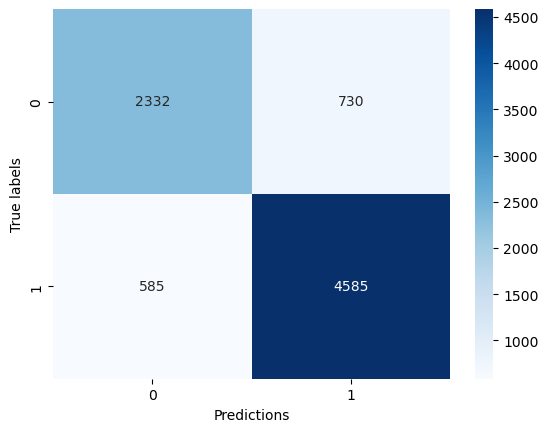

In [100]:
# Calcula la matriz de confusión
conf_matrix = tf.math.confusion_matrix(y_true, y_pred)

# Convierte la matriz de confusión a un array NumPy para visualización
conf_matrix_np = conf_matrix.numpy()

# Visualiza la matriz de confusión (opcional, puedes omitir esta parte si no deseas visualizarla)
sns.heatmap(conf_matrix_np, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predictions')
plt.ylabel('True labels')
plt.show()


#### Veamos algunas predicciones erróneas

In [104]:
# si no quiero trabajar el dataset por lotes debo hace un unbatch

dataset = validation_dataset.unbatch()

subset = dataset.take(25)

errores = []

for text,label in subset:
    
    # text es (,) y necesito que sea (1,)
    text = tf.expand_dims(text, axis=0)
    
    # predictions
    prediction = final_model.predict(text,verbose=0)
        
    # paso a binario
    binary_pred = tf.squeeze(tf.round(prediction))
    #
    
    
    true = label.numpy()
    pred = binary_pred.numpy()
    texto = text.numpy()
    
    bytes_value = np.ndarray.tobytes(texto)
        
    if true != pred:
        texto = text.numpy()
        errores.append({'text':texto,'true label':true,'pred':pred,'pred_prob':prediction[0][0]})
        
    

In [105]:
errors_df = pd.DataFrame(errores)

errors_df


,text,true label,pred,pred_prob
0,"[b' coronavirus chaos , i\xc3\xa2\xc2\x92m grateful faith jesus grocery store worker get paid little working tirelessly putting health risk ( used one many moon ago ) . hbu mvrydaghswhio rhunttv http : //t.co/palf4hzte6']",0,1.0,5.884324e-01
1,"[b'grocery store worker insisted helping senior , disabled covid-19 death http : //t.co/9gg0kpzdkb societymarylandcoronavirusfeelgood via 6abc http : //t.co/penotipjud']",0,1.0,9.988986e-01
2,"[b'verify : hand sanitizer change skin ph level , making vulnerable coronavirus ? http : //t.co/vwwzij9y9x']",1,0.0,1.190023e-01
3,[b' 10downingstreet lot taxi driver sitting idle . lot elderly self-isolating folk need food delivery supermarket can\xc3\xa2\xc2\x92t cope demand . solution ? ? coronavirus ukgoverment'],1,0.0,2.595863e-10


#### Predicciones con datos nuevos

In [114]:
"""
En la inferencia, la entrada debe pasar previamente por el pre-procesamiento (en este ejemplo
por preprocess_text y pre-process_text2); no hace falta que pase por las caspas de text vectorization
y embedding pues son parte del modelo
"""



def predict(input_text):
    """
    Recibe un texto de entrada y devuelve la pred.
    """
    # pre-procesamiento
    input_text = preprocess_text(input_text)
    input_text = preprocess_text2(input_text)

    # predicción
    pred = final_model.predict(np.array([input_text]),verbose=0)

    # Convertir la salida a una predicción binaria (0 o 1)
    binary_pred = 1 if pred[0, 0] > 0.5 else 0
    
    # retorno
    return pred, binary_pred



texts = ["hot new drug help covid-19","covid is terrible","some text", "i'm a little sad"]


for t in texts:
    [pred,binary_pred] = predict(t)
    print(f"{t}, {pred}, {binary_pred}\n")



hot new drug help covid-19, [[1.]], 1

covid is terrible, [[0.]], 0

some text, [[0.99999994]], 1

i'm a little sad, [[1.3640256e-37]], 0



<a name="9"> </a>
## 9. Guardando el modelo

In [115]:
final_model.save('final_model',save_format='tf') # las capas de vect. no pueden guardasrse con h5 aún

INFO:tensorflow:Assets written to: final_model/assets


INFO:tensorflow:Assets written to: final_model/assets


<a name="10"> </a>
## 10. Conclusiones

Se compararon diferentes modelos, se escogió el mejor siguiendo un determinado criterio y se ajustó el mismo.
Se obtuvo un sistema que puede predecir si un sentimiento respecto al COVID es positivo o negativo con una exactitud 
del 82% y un F1-Score del 85%.

